In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
import pyfiglet as pyf
print(pyf.figlet_format('Kelompok - 12'))
print(''' Anggota Kelompok:
    1. Ahmad Ihda Falah Annur - 1206220015
    2. Talitha Rahmadewati Witanto - 1206220022
    3. Nasywa Almaasah Zatri - 1206220012
''')
print(pyf.figlet_format('---------'))
print(pyf.figlet_format('RUMUSAN MASALAH'))


print('''
    1. Bagaimana dinamika jumlah peminat dan daya tampung dari tahun 2017 hingga 2021?
    2. Adakah perguruan tinggi yang mengalami ketidakseimbangan antara minat pendaftar dan kapasitasnya pada tahun 2020?
       Jika ada, perguruan tinggi mana yang menghadapi tantangan tersebut?
    3. Bagaimana persebaran geografis perguruan tinggi di Indonesia menurut pulau-pulau tempat universitas 
       tersebut berada?
''')

print(pyf.figlet_format('-----------'))

 _  __    _                             _              _ ____  
| |/ /___| | ___  _ __ ___  _ __   ___ | | __         / |___ \ 
| ' // _ \ |/ _ \| '_ ` _ \| '_ \ / _ \| |/ /  _____  | | __) |
| . \  __/ | (_) | | | | | | |_) | (_) |   <  |_____| | |/ __/ 
|_|\_\___|_|\___/|_| |_| |_| .__/ \___/|_|\_\         |_|_____|
                           |_|                                 

 Anggota Kelompok:
    1. Ahmad Ihda Falah Annur - 1206220015
    2. Talitha Rahmadewati Witanto - 1206220022
    3. Nasywa Almaasah Zatri - 1206220012

                                                       
                                                       
 _____ _____ _____ _____ _____ _____ _____ _____ _____ 
|_____|_____|_____|_____|_____|_____|_____|_____|_____|
                                                       
                                                       

 ____  _   _ __  __ _   _ ____    _    _   _ 
|  _ \| | | |  \/  | | | / ___|  / \  | \ | |
| |_) | | | | |\/| | | | \___ \ /

## Latar belakang: 
Dipicu oleh kebutuhan untuk memahami perubahan dan dinamika penerimaan mahasiswa di universitas-universitas Indonesia dari tahun 2017 hingga 2021. Pada Analisis Time Series ini dapat   mengidentifikasi tren jangka panjang dalam jumlah peminat dan daya tampung serta lebih mengenal faktor lain yang mempengaruhi jumlah penerimaan mahasiswa. Perbandingan antara jumlah peminat dan daya tampung universitas, khususnya pada tahun 2020, untuk mengevaluasi ketidakseimbangan yang mungkin akan terjadi. Analisis ini diharap dapat memberikan wawasan strategis yang berguna bagi pengambilan keputusan di tingkat universitas, terutama terkait kebijakan penerimaan mahasiswa.

### DATASET:
https://github.com/talitharhmd/Exploratory-Data-Analysis/tree/3ec240d0b2a6501403fac2eba7cb8ecd4d38c096/PTN%20Indonesia_Dataset

### METADATA Seputar Dataset
#### • Data Perguruan Tinggi Negeri Indonesia
- info_universitas: Informasi tentang universitas yang terdiri dari kode universitas dan nama universitas.
- nama prodi: Nama dari program studi yang ditawarkan oleh perguruan tinggi
- jenis: Jenis program studi, misalnya SAINTEK atau SOSHUM.
- jumlah peminat_2017: Jumlah peminat pada tahun 2017 untuk program studi tersebut.
- jumlah peminat_2018: Jumlah peminat pada tahun 2018 untuk program studi tersebut.
- jumlah peminat_2019: Jumlah peminat pada tahun 2019 untuk program studi tersebut.
- jumlah peminat_2020: Jumlah peminat pada tahun 2020 untuk program studi tersebut.
- jumlah peminat_2021: Jumlah peminat pada tahun 2021 untuk program studi tersebut.
- letak universitas: Keterangan letak pulau tempat dimana universitas berada

#### • Data Daya Tampung
- info_universitas: Informasi tentang universitas yang terdiri dari kode universitas dan nama universitas.
- daya tampung_2017: Kapasitas atau daya tampung universitas untuk tahun 2017.
- daya tampung_2018: Kapasitas atau daya tampung universitas untuk tahun 2018.
- daya tampung_2019: Kapasitas atau daya tampung universitas untuk tahun 2019.
- daya tampung_2020: Kapasitas atau daya tampung universitas untuk tahun 2020.
- daya tampung_2021: Kapasitas atau daya tampung universitas untuk tahun 2021.

In [7]:
df = pd.read_excel('https://github.com/talitharhmd/Exploratory-Data-Analysis/raw/main/PTN%20Indonesia_Dataset/Data%20Perguruan%20Tinggi%20Negeri%20di%20Indonesia%20dan%20Letaknya.xlsx')
df = df.fillna(0)
df

,info_universitas,nama prodi,jenis,jumlah peminat_2017,jumlah peminat_2018,jumlah peminat_2019,jumlah peminat_2020,jumlah peminat_2021,letak universitas
0,111_Universitas Syiah Kuala,PENDIDIKAN DOKTER,SAINTEK,913,921,712,455,628,Sumatera
1,111_Universitas Syiah Kuala,TEKNIK SIPIL,SAINTEK,1686,1567,753,741,788,Sumatera
2,111_Universitas Syiah Kuala,TEKNIK MESIN,SAINTEK,648,621,292,338,264,Sumatera
3,111_Universitas Syiah Kuala,KIMIA,SAINTEK,371,322,296,201,156,Sumatera
4,111_Universitas Syiah Kuala,ARSITEKTUR,SAINTEK,809,761,487,410,417,Sumatera
...,...,...,...,...,...,...,...,...,...
3152,921_Universitas Papua,EKONOMI,SOSHUM,96,63,24,15,17,Papua
3153,921_Universitas Papua,MANAJEMEN,SOSHUM,150,110,45,26,45,Papua
3154,921_Universitas Papua,AKUNTANSI,SOSHUM,148,91,18,22,39,Papua
3155,921_Universitas Papua,BAHASA DAN SASTRA INDONESIA,SOSHUM,66,44,13,5,6,Papua


In [6]:
df1 = pd.read_excel('https://github.com/talitharhmd/Exploratory-Data-Analysis/raw/main/PTN%20Indonesia_Dataset/Data%20Daya%20Tampung%20SNBT%20PTN%20di%20Indonesia.xlsx')
df1 = df1.fillna(0)
df1

,info_universitas,daya tampung_2017,daya tampung_2018,daya tampung_2019,daya tampung_2020,daya tampung_2021
0,111_Universitas Syiah Kuala,88.0,96.0,91,109,103
1,111_Universitas Syiah Kuala,64.0,62.0,66,82,81
2,111_Universitas Syiah Kuala,48.0,48.0,53,69,71
3,111_Universitas Syiah Kuala,48.0,47.0,49,69,64
4,111_Universitas Syiah Kuala,48.0,44.0,49,69,63
...,...,...,...,...,...,...
3152,921_Universitas Papua,22.0,44.0,32,51,51
3153,921_Universitas Papua,21.0,50.0,32,44,44
3154,921_Universitas Papua,24.0,43.0,32,49,49
3155,921_Universitas Papua,20.0,26.0,16,28,28


In [5]:
# Melt DataFrame untuk mengubah menjadi format tidy
tidy = pd.melt(df, id_vars=['info_universitas','nama prodi', 'jenis', 'letak universitas'], var_name='Jumlah Peminat', value_name='jumlah_peminat')

# Memisahkan Kolom Info Universitas menjadi kolom baru, yaitu kode univ dan nama universitas
tidy[['kode_univ', 'nama_universitas']] = tidy['info_universitas'].str.split('_', expand=True)

# Memisahkan Kolom Jumlah Peminat menjadi kolom baru, yaitu peminat dan tahun
tidy[['peminat', 'tahun']] = tidy['Jumlah Peminat'].str.split('_', expand=True)

# Menghapus Kolom yang tidak dibutuhkan, agar datanya semakin mudah untuk dipahami
tidy = tidy.drop(['info_universitas', 'peminat', 'Jumlah Peminat'], axis=1)

# Mengganti Urutan Kolom data agar lebih dipahami
tidy = tidy[['kode_univ', 'nama_universitas', 'nama prodi', 'jenis', 'tahun', 'jumlah_peminat', 'letak universitas']]
tidy

,kode_univ,nama_universitas,nama prodi,jenis,tahun,jumlah_peminat,letak universitas
0,111,Universitas Syiah Kuala,PENDIDIKAN DOKTER,SAINTEK,2017,913,Sumatera
1,111,Universitas Syiah Kuala,TEKNIK SIPIL,SAINTEK,2017,1686,Sumatera
2,111,Universitas Syiah Kuala,TEKNIK MESIN,SAINTEK,2017,648,Sumatera
3,111,Universitas Syiah Kuala,KIMIA,SAINTEK,2017,371,Sumatera
4,111,Universitas Syiah Kuala,ARSITEKTUR,SAINTEK,2017,809,Sumatera
...,...,...,...,...,...,...,...
15780,921,Universitas Papua,EKONOMI,SOSHUM,2021,17,Papua
15781,921,Universitas Papua,MANAJEMEN,SOSHUM,2021,45,Papua
15782,921,Universitas Papua,AKUNTANSI,SOSHUM,2021,39,Papua
15783,921,Universitas Papua,BAHASA DAN SASTRA INDONESIA,SOSHUM,2021,6,Papua


In [6]:
# Melt DataFrame untuk mengubah menjadi format tidy
tidy1 = pd.melt(df1, id_vars=['info_universitas'], var_name='Daya Tampung', value_name='jumlah_daya_tampung')

# Memisahkan Kolom Info Universitas menjadi kolom baru, yaitu kode univ dan nama universitas
tidy1[['kode_univ', 'nama_universitas']] = tidy1['info_universitas'].str.split('_', expand=True)

# Memisahkan Kolom Jumlah Peminat menjadi kolom baru, yaitu peminat dan tahun
tidy1[['dayatampung', 'tahun']] = tidy1['Daya Tampung'].str.split('_', expand=True)

# Menghapus Kolom yang tidak dibutuhkan, agar datanya semakin mudah untuk dipahami
tidy1 = tidy1.drop(['info_universitas', 'dayatampung', 'Daya Tampung'], axis=1)

# Mengganti Urutan Kolom data agar lebih dipahami
tidy1 = tidy1[['kode_univ', 'nama_universitas', 'tahun', 'jumlah_daya_tampung']]
tidy1

,kode_univ,nama_universitas,tahun,jumlah_daya_tampung
0,111,Universitas Syiah Kuala,2017,88.0
1,111,Universitas Syiah Kuala,2017,64.0
2,111,Universitas Syiah Kuala,2017,48.0
3,111,Universitas Syiah Kuala,2017,48.0
4,111,Universitas Syiah Kuala,2017,48.0
...,...,...,...,...
15780,921,Universitas Papua,2021,51.0
15781,921,Universitas Papua,2021,44.0
15782,921,Universitas Papua,2021,49.0
15783,921,Universitas Papua,2021,28.0


In [7]:
# Menggabungkan Kedua data dengan memakai Concat Karena memiliki rows dan beberapa kolom yang sama
data = pd.concat([tidy, tidy1['jumlah_daya_tampung']], axis=1)

# Menggganti Urutan Kolom data
data = data[['kode_univ', 'nama_universitas', 'nama prodi', 'jenis', 'tahun', 'jumlah_peminat', 'jumlah_daya_tampung', 'letak universitas']]
data

,kode_univ,nama_universitas,nama prodi,jenis,tahun,jumlah_peminat,jumlah_daya_tampung,letak universitas
0,111,Universitas Syiah Kuala,PENDIDIKAN DOKTER,SAINTEK,2017,913,88.0,Sumatera
1,111,Universitas Syiah Kuala,TEKNIK SIPIL,SAINTEK,2017,1686,64.0,Sumatera
2,111,Universitas Syiah Kuala,TEKNIK MESIN,SAINTEK,2017,648,48.0,Sumatera
3,111,Universitas Syiah Kuala,KIMIA,SAINTEK,2017,371,48.0,Sumatera
4,111,Universitas Syiah Kuala,ARSITEKTUR,SAINTEK,2017,809,48.0,Sumatera
...,...,...,...,...,...,...,...,...
15780,921,Universitas Papua,EKONOMI,SOSHUM,2021,17,51.0,Papua
15781,921,Universitas Papua,MANAJEMEN,SOSHUM,2021,45,44.0,Papua
15782,921,Universitas Papua,AKUNTANSI,SOSHUM,2021,39,49.0,Papua
15783,921,Universitas Papua,BAHASA DAN SASTRA INDONESIA,SOSHUM,2021,6,28.0,Papua


In [8]:
# Mengecek info dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15785 entries, 0 to 15784
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   kode_univ            15785 non-null  object 
 1   nama_universitas     15785 non-null  object 
 2   nama prodi           15785 non-null  object 
 3   jenis                15785 non-null  object 
 4   tahun                15785 non-null  object 
 5   jumlah_peminat       15785 non-null  int64  
 6   jumlah_daya_tampung  15785 non-null  float64
 7   letak universitas    15785 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 986.7+ KB


In [9]:
# Mengubah tipedata pada kolom yang dipilih
data['kode_univ'] = data['kode_univ'].astype(int)
data['jumlah_daya_tampung'] = data['jumlah_daya_tampung'].astype(int)
data

,kode_univ,nama_universitas,nama prodi,jenis,tahun,jumlah_peminat,jumlah_daya_tampung,letak universitas
0,111,Universitas Syiah Kuala,PENDIDIKAN DOKTER,SAINTEK,2017,913,88,Sumatera
1,111,Universitas Syiah Kuala,TEKNIK SIPIL,SAINTEK,2017,1686,64,Sumatera
2,111,Universitas Syiah Kuala,TEKNIK MESIN,SAINTEK,2017,648,48,Sumatera
3,111,Universitas Syiah Kuala,KIMIA,SAINTEK,2017,371,48,Sumatera
4,111,Universitas Syiah Kuala,ARSITEKTUR,SAINTEK,2017,809,48,Sumatera
...,...,...,...,...,...,...,...,...
15780,921,Universitas Papua,EKONOMI,SOSHUM,2021,17,51,Papua
15781,921,Universitas Papua,MANAJEMEN,SOSHUM,2021,45,44,Papua
15782,921,Universitas Papua,AKUNTANSI,SOSHUM,2021,39,49,Papua
15783,921,Universitas Papua,BAHASA DAN SASTRA INDONESIA,SOSHUM,2021,6,28,Papua


In [10]:
# Mengecek Missing Value
data.isnull().sum()

kode_univ              0
nama_universitas       0
nama prodi             0
jenis                  0
tahun                  0
jumlah_peminat         0
jumlah_daya_tampung    0
letak universitas      0
dtype: int64

In [11]:
# Menghapus data yang duplicate
data = data.drop_duplicates()
data

,kode_univ,nama_universitas,nama prodi,jenis,tahun,jumlah_peminat,jumlah_daya_tampung,letak universitas
0,111,Universitas Syiah Kuala,PENDIDIKAN DOKTER,SAINTEK,2017,913,88,Sumatera
1,111,Universitas Syiah Kuala,TEKNIK SIPIL,SAINTEK,2017,1686,64,Sumatera
2,111,Universitas Syiah Kuala,TEKNIK MESIN,SAINTEK,2017,648,48,Sumatera
3,111,Universitas Syiah Kuala,KIMIA,SAINTEK,2017,371,48,Sumatera
4,111,Universitas Syiah Kuala,ARSITEKTUR,SAINTEK,2017,809,48,Sumatera
...,...,...,...,...,...,...,...,...
15780,921,Universitas Papua,EKONOMI,SOSHUM,2021,17,51,Papua
15781,921,Universitas Papua,MANAJEMEN,SOSHUM,2021,45,44,Papua
15782,921,Universitas Papua,AKUNTANSI,SOSHUM,2021,39,49,Papua
15783,921,Universitas Papua,BAHASA DAN SASTRA INDONESIA,SOSHUM,2021,6,28,Papua


## Proses Time-Series 

In [12]:
df = data.copy()

In [13]:
# Menjadikan format Kolom Tahun menjadi 
df['tahun'] = pd.to_datetime(df['tahun'], format='%Y')

# Set kolom 'tahun' sebagai indeks
df.set_index('tahun', inplace=True)

In [14]:
df

,kode_univ,nama_universitas,nama prodi,jenis,jumlah_peminat,jumlah_daya_tampung,letak universitas
tahun,,,,,,,
2017-01-01,111,Universitas Syiah Kuala,PENDIDIKAN DOKTER,SAINTEK,913,88,Sumatera
2017-01-01,111,Universitas Syiah Kuala,TEKNIK SIPIL,SAINTEK,1686,64,Sumatera
2017-01-01,111,Universitas Syiah Kuala,TEKNIK MESIN,SAINTEK,648,48,Sumatera
2017-01-01,111,Universitas Syiah Kuala,KIMIA,SAINTEK,371,48,Sumatera
2017-01-01,111,Universitas Syiah Kuala,ARSITEKTUR,SAINTEK,809,48,Sumatera
...,...,...,...,...,...,...,...
2021-01-01,921,Universitas Papua,EKONOMI,SOSHUM,17,51,Papua
2021-01-01,921,Universitas Papua,MANAJEMEN,SOSHUM,45,44,Papua
2021-01-01,921,Universitas Papua,AKUNTANSI,SOSHUM,39,49,Papua


# 1. Bagaimana dinamika jumlah peminat dan daya tampung dari tahun 2017 hingga 2021?

In [15]:
# Resample Jumlah Peminat
tren_jumlah_peminat = df['jumlah_peminat'].resample('Y').sum()
tren_jumlah_peminat

tahun
2017-12-31    2298992
2018-12-31    2494798
2019-12-31    1411285
2020-12-31    1371861
2021-12-31    1446940
Freq: A-DEC, Name: jumlah_peminat, dtype: int64

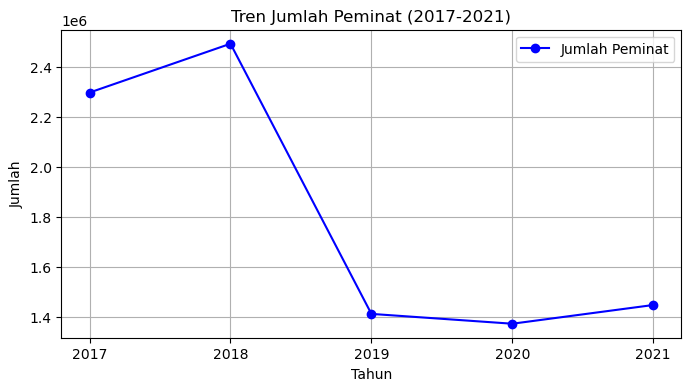

In [16]:
# Plot hasil resampling
plt.figure(figsize=(8, 4))
plt.plot(tren_jumlah_peminat.index.year, tren_jumlah_peminat, marker='o', label='Jumlah Peminat', color='blue')
plt.title('Tren Jumlah Peminat (2017-2021)')
plt.xlabel('Tahun')
plt.ylabel('Jumlah')
plt.xticks(tren_jumlah_peminat.index.year)  # Menampilkan hanya tahun di sumbu x
plt.legend()
plt.grid(True)
plt.show()

In [17]:
# Resample Jumlah Daya Tampung
tren_daya_tampung = df['jumlah_daya_tampung'].resample('Y').sum()
tren_daya_tampung

tahun
2017-12-31    138525
2018-12-31    160368
2019-12-31    179522
2020-12-31    177785
2021-12-31    178265
Freq: A-DEC, Name: jumlah_daya_tampung, dtype: int32

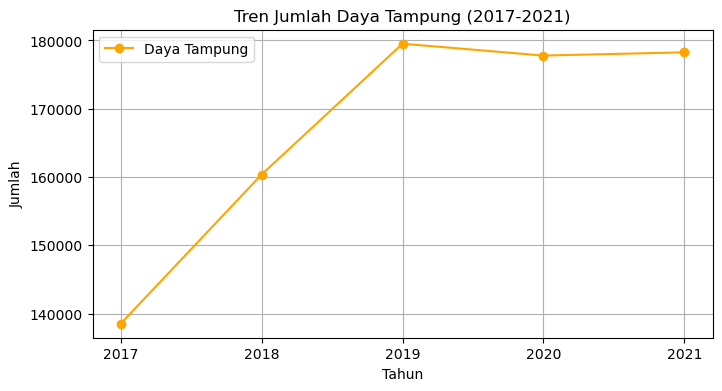

In [18]:
# Plot hasil resampling
plt.figure(figsize=(8, 4))
plt.plot(tren_daya_tampung.index.year, tren_daya_tampung, marker='o', label='Daya Tampung', color='orange')
plt.title('Tren Jumlah Daya Tampung (2017-2021)')
plt.xlabel('Tahun')
plt.ylabel('Jumlah')
plt.xticks(tren_daya_tampung.index.year)  # Menampilkan hanya tahun di sumbu x
plt.legend()
plt.grid(True)
plt.show()

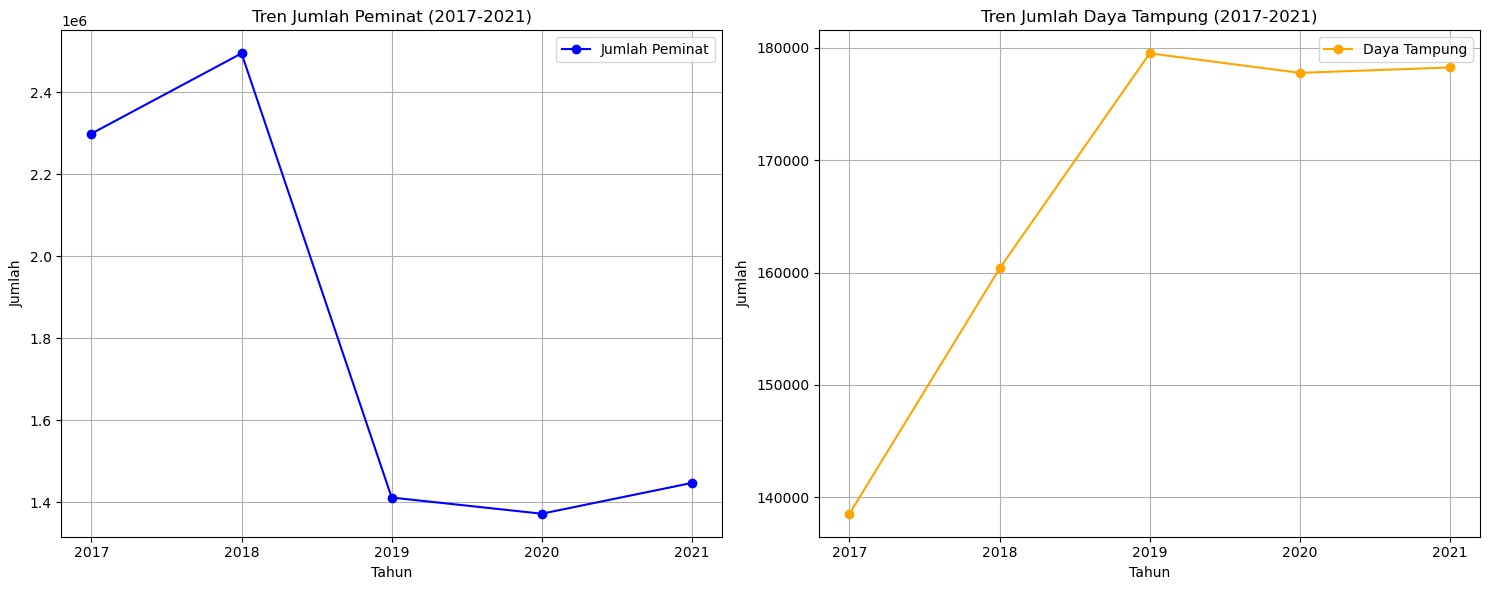

In [19]:
# Membuat subplot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot tren jumlah peminat
ax1.plot(tren_jumlah_peminat.index.year, tren_jumlah_peminat, marker='o', label='Jumlah Peminat', color='blue')
ax1.set_title('Tren Jumlah Peminat (2017-2021)')
ax1.set_xlabel('Tahun')
ax1.set_ylabel('Jumlah')
ax1.set_xticks(tren_jumlah_peminat.index.year)
ax1.legend()
ax1.grid(True)

# Plot tren jumlah daya tampung
ax2.plot(tren_daya_tampung.index.year, tren_daya_tampung, marker='o', label='Daya Tampung', color='orange')
ax2.set_title('Tren Jumlah Daya Tampung (2017-2021)')
ax2.set_xlabel('Tahun')
ax2.set_ylabel('Jumlah')
ax2.set_xticks(tren_daya_tampung.index.year)
ax2.legend()
ax2.grid(True)

# Menampilkan subplot
plt.tight_layout()
plt.show()


Interpretasi :
Berdasarkan data pada kedua grafik tersebut, dapat disimpulkan beberapa hal:
- bahwa jumlah peminat perguruan tinggi tersebut lebih tinggi daripada jumlah daya tampung. Hal ini menunjukkan bahwa persaingan untuk masuk ke perguruan tinggi tersebut semakin ketat.
- bahwa pada setiap tahunnya, jumlah daya tampung selalu meningkat akan tetapi berbanding terbalik jumlah peminat yang setiap tahunnya itu kebanyakan menurun. Dengan meningkatnya daya tampung, itu berarti perguruan tinggi sudah mencoba untuk memaksimalkan usahanya dalam menerima jumlah peminatnya. Namun pada beberapa tahun, terdapat beberapa faktor, salah satunya adalah covid-19 dimana itu menjadikan jumlah peminat berkurang dan perguruan tinggi pun mengurangi lagi kapasitas penerimaannya.
- bahwa karena hampir setiap tahun jumlah peminat itu menurun, dan jumlah daya tampung itu meningkat, maka itu berarti persaingan untuk diterima ke dalam perguruan tinggi tersebut lebih mudah.

# 2. Adakah perguruan tinggi yang mengalami ketidakseimbangan antara minat pendaftar dan kapasitasnya pada tahun 2020?Jika ada, perguruan tinggi mana yang menghadapi tantangan tersebut?

In [20]:
# Memfilter data hanya untuk tahun 2020
data_2020 = data[data['tahun'] == '2020']

# Mengelompokkan data jumlah peminat per universitas dan daya tampung menggunakan sum
jumlah_peminat_per_univ = data_2020.groupby('nama_universitas')['jumlah_peminat'].sum().reset_index()
daya_tampung_per_univ = data_2020.groupby('nama_universitas')['jumlah_daya_tampung'].sum().reset_index()

# Menggabungkan data
gabung = pd.concat([jumlah_peminat_per_univ, daya_tampung_per_univ['jumlah_daya_tampung']], axis=1)
gabung

,nama_universitas,jumlah_peminat,jumlah_daya_tampung
0,ISBI ACEH,23,112
1,ISBI Bandung,519,184
2,ISBI Tanah Papua,2,45
3,ISI Denpasar,492,264
4,ISI Padang Panjang,521,401
...,...,...,...
80,Universitas Teuku Umar,1465,1101
81,Universitas Tidar,6271,1356
82,Universitas Timor,1545,980
83,Universitas Trunojoyo Madura,7338,2502


In [21]:
# Memfilter universitas dengan jumlah peminat lebih rendah daripada daya tampung
ptn_sepi_peminat = gabung[gabung['jumlah_peminat'] < gabung['jumlah_daya_tampung']]

ptn_sepi_peminat_sort = ptn_sepi_peminat.sort_values(by=['jumlah_peminat', 'jumlah_daya_tampung'])
ptn_sepi_peminat_sort

,nama_universitas,jumlah_peminat,jumlah_daya_tampung
2,ISBI Tanah Papua,2,45
0,ISBI ACEH,23,112
62,Universitas Papua,208,937
49,Universitas Musamus Merauke,401,1450
70,Universitas Sembilan Belas November Kolaka,1098,2335
54,Universitas Negeri Manado,2358,2517
63,Universitas Pattimura,3265,3847


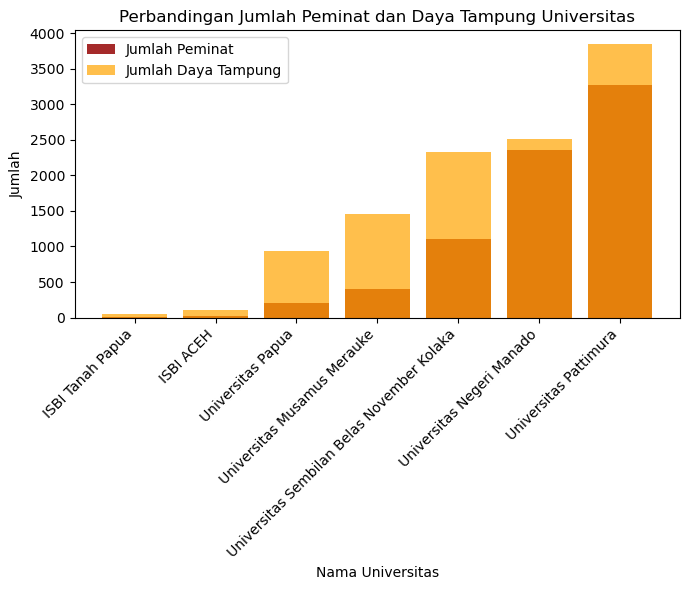

In [22]:
plt.figure(figsize=(7, 6))

# Membuat bar chart
plt.bar(ptn_sepi_peminat_sort['nama_universitas'], ptn_sepi_peminat_sort['jumlah_peminat'], label='Jumlah Peminat', color='brown')
plt.bar(ptn_sepi_peminat_sort['nama_universitas'], ptn_sepi_peminat_sort['jumlah_daya_tampung'], label='Jumlah Daya Tampung', color='orange', alpha=0.7)

# Menambahkan label dan judul
plt.xlabel('Nama Universitas')
plt.ylabel('Jumlah')
plt.title('Perbandingan Jumlah Peminat dan Daya Tampung Universitas')
plt.legend()

# Menyesuaikan tata letak dan menampilkan grafik
plt.xticks(rotation=45, ha='right')  # Rotasi label sumbu x agar tidak tumpang tindih
plt.tight_layout()
plt.show()

Interpretasi: Ya, terdapat perguruan tinggi yang mengalami ketidakseimbangan antara minat pendaftar dan kapasitasnya pada tahun 2020.
- Berdasarkan grafik tersebut, dapat dikatakan bahwa ketidakseimbangan antara minat pendaftar dan kapasitas perguruan tinggi paling tinggi pada tahun 2020 terjadi di **perguruan tinggi daerah luar Jawa**, khususnya di Merauke yaitu pada Universitas Sembilan Belas November Kolaka. Hal ini dapat disebabkan oleh beberapa faktor:
1. Mungkin Perguruan tinggi di daerah luar Jawa umumnya memiliki fasilitas dan kualitas pendidikan yang belum memadai dibandingkan dengan perguruan tinggi di Jawa. Hal ini dapat menyebabkan minat pendaftar menjadi lebih rendah.
2. Mungkin biaya pendidikan di perguruan tinggi di daerah luar Jawa umumnya lebih mahal dan kurang terjangkau dibandingkan dengan perguruan tinggi di Jawa. Hal ini dapat menyebabkan minat pendaftar menjadi lebih tinggi.

# 3. Bagaimana persebaran geografis perguruan tinggi di Indonesia menurut pulau-pulau tempat universitas tersebut berada?

In [23]:
df = data.copy()

In [24]:
# Menghitung jumlah universitas pada tiap lokasi
jumlah_univ_per_lokasi = df.groupby('letak universitas')['nama_universitas'].nunique()
jumlah_univ_per_lokasi

letak universitas
Jawa             35
Kalimantan        6
Nusa Tenggara     6
Papua             4
Sulawesi         12
Sumatera         22
Name: nama_universitas, dtype: int64

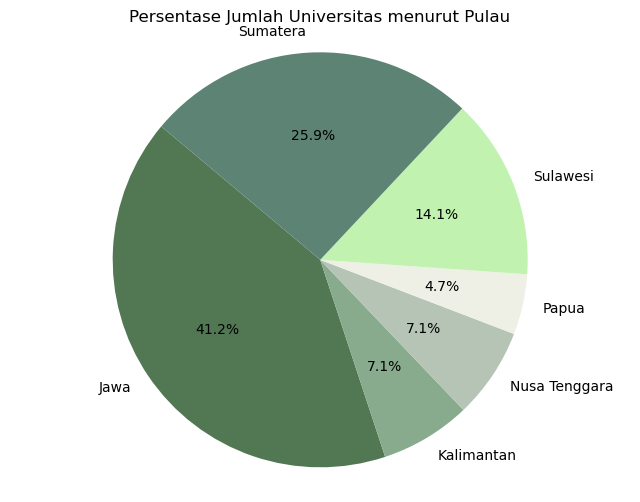

In [25]:
import matplotlib.pyplot as plt

# Menentukan warna yang akan dipakai
colors = ['#527853', '#88AB8E', '#B6C4B6', '#EEF0E5', '#C1F2B0', '#5C8374']

# Membuat pie chart dengan warna manual
plt.figure(figsize=(8, 6))
plt.pie(jumlah_univ_per_lokasi, labels=jumlah_univ_per_lokasi.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.axis('equal')  # Memastikan pie chart berbentuk lingkaran
plt.title('Persentase Jumlah Universitas menurut Pulau')
plt.show()

Interpretasi: 
- Berdasarkan data dan visualisasi diatas, dilihat dari presentase jumlah universitas menurut pulau, persebaran tertinggi pada perguruan tinggi ditempati oleh Pulau Jawa sebesar 41.2% dan Pulau Sumatera sebesar 25.9% . Sedangkan untuk persebaran terendah ditempati oleh Pulau Papua sebesar 4.7%

## Saran
- Perguruan tinggi perlu melakukan evaluasi terhadap strategi pemasarannya, contohnya Meningkatkan promosi dan branding perguruan tinggi. Karena terdapat penurunan jumlah peminat dalam tahunnya, dan juga ketidakseimbangan penyebaran perguruan tinggi itu mungkin dapat disebabkan oleh beberapa faktor, diantaranya:
1. Perubahan tren pendidikan tinggi di masyarakat
2. Persaingan yang semakin ketat dari perguruan tinggi lain
3. Perubahan reputasi perguruan tinggi tersebut
- Dengan diadakannya evaluasi terhadap strategi pemasarannya, itu akan menjadikan peminat akan semakin mengetahui tentang perguruan tinggi tersebut sekaligus menarik peminat yang menjadikan peminat tersebut memilih perguruan tinggi tersebut